## Free Energy Tutorial

Following Rafal Bogacz's "A tutorial on the free-energy framework for modelling perception and learning"

https://www.sciencedirect.com/science/article/pii/S0022249615000759



### Example 1: Perceiving size of an item *u* based on light intensity

Since reflected light scales with the area, we can consider a function like 

$$ g(v) = v^2  $$ 

and 

$$ p(u|v) = f(u; g(v), \Sigma_u) $$

where

$$ f(x; \mu, \Sigma) = \frac{1}{ \sqrt{2 \pi \Sigma}} exp (-\frac{(x-\mu)^2}{2\Sigma}$$

Let's assume the animal has a prior for how large such items usually are:

$$ p(v) = f(u; u_p, \Sigma_p) $$

where "p" stands for "prior"

### Solving using Bayes' theorem (exact)

Probability of size v given input u

$$ p(v|u) = \frac{p(v)p(u|v)}{p(u)} $$


### Exercise 1: 

Assume we observed light intensity u = 2, with noise $\Sigma$ = 1, $u_p = 3$ and $\Sigma_p = 1$. Computer the posterior for sizes from 0.01 to 5 and plot them.

In [34]:
using PyPlot, Statistics, LinearAlgebra, Distributions
using LaTeXStrings
u = 2
Σ = 1
u_prior = 3
Σ_prior = 1
sizes = 0.01:0.01:5;

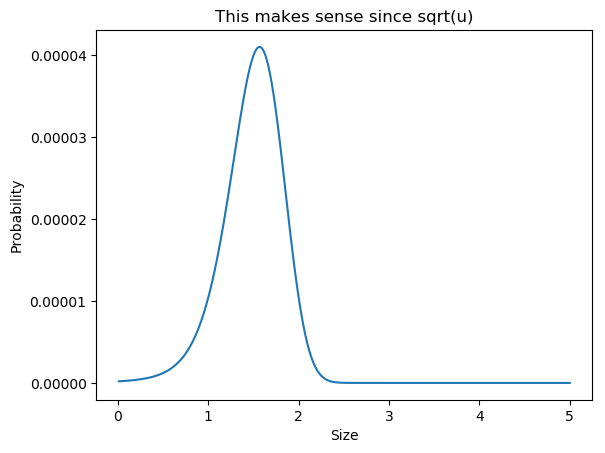

PyObject Text(0.5, 1.0, 'This makes sense since sqrt(u)')

In [46]:
function bayes_posterior(u, Σ, u_prior, Σ_prior, sizes)
    post = zeros(length(sizes))
    sum_sizes = sum(sizes)
    
    prior = pdf.(Normal(u_prior, Σ_prior), sizes)
    likelihood = pdf.(Normal(u, Σ), sizes.^2) # <- g(v)
    p = (prior .* likelihood) / sum_sizes
    
    return p
end

A = bayes_posterior(u, Σ, u_prior, Σ_prior, sizes);
plot(sizes, A)
xlabel("Size")
ylabel("Probability")
title("This makes sense since sqrt(u)")